# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [3]:
import requests
import json

cotacoes = requests.get("https://economia.awesomeapi.com.br/json/all")
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.2629', 'low': '5.261', 'varBid': '-0.0016', 'pctChange': '-0.03', 'bid': '5.2605', 'ask': '5.2615', 'timestamp': '1665710501', 'create_date': '2022-10-13 22:21:41'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.305', 'low': '5.305', 'varBid': '0', 'pctChange': '0', 'bid': '5.15', 'ask': '5.46', 'timestamp': '1665689820', 'create_date': '2022-10-13 16:37:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.8373', 'low': '3.8206', 'varBid': '0.0061', 'pctChange': '0.16', 'bid': '3.8314', 'ask': '3.8332', 'timestamp': '1665727044', 'create_date': '2022-10-14 02:57:24'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '5.9788', 'low': '5.9397', 'varBid': '-0.0065', 'pctChange': '-0.11', 'bid': '5.9533', 'ask': '5.9555', 'timestamp': '1665727045', 'cr

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

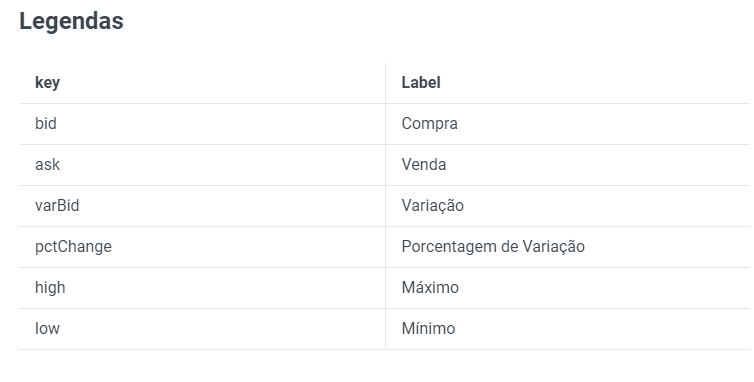

In [14]:
print(f'Dolar {cotacoes_dic["USD"]["bid"]}')
print(f'Dolar {cotacoes_dic["EUR"]["bid"]}')
print(f'Dolar {cotacoes_dic["BTC"]["bid"]}')

Dolar 5.2605
Dolar 5.1421
Dolar 104.131


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [28]:
cotacoes_dolar30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes_dolar30d_dic =  cotacoes_dolar30d.json()
#print(cotacoes_dolar30d_dic[2]['bid'])

#list compreheshion
lista_cotacoes_dolar = [float(item['bid']) for item in cotacoes_dolar30d_dic]
print(len(lista_cotacoes_dolar))

30


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [42]:
cotacoes_btc = requests.get("https://economia.awesomeapi.com.br/USD-BRL/260?start_date=20220101&end_date=20221001")
cotacoes_btc_dic = cotacoes_btc.json()
lista_cotacoes_btc = [float(item['bid'])for item in cotacoes_btc_dic]
print(lista_cotacoes_btc)
print(len(lista_cotacoes_btc))

[5.4084, 5.4099, 5.4099, 5.4079, 5.4059, 5.4024, 5.4013, 5.3994, 5.4089, 5.4096, 5.4079, 5.4054, 5.4059, 5.3965, 5.3974, 5.3984, 5.3999, 5.404, 5.4049, 5.4043, 5.4005, 5.3978, 5.3974, 5.3974, 5.3959, 5.3974, 5.3979, 5.3991, 5.3999, 5.3974, 5.3989, 5.3969, 5.3981, 5.3978, 5.4015, 5.399, 5.3944, 5.3954, 5.3955, 5.3915, 5.3876, 5.3879, 5.3904, 5.3935, 5.3924, 5.3939, 5.3924, 5.3903, 5.3903, 5.394, 5.3931, 5.3936, 5.3936, 5.3948, 5.3959, 5.3951, 5.3924, 5.3903, 5.3914, 5.3911, 5.3894, 5.3884, 5.387, 5.3889, 5.3889, 5.3861, 5.3835, 5.3859, 5.3843, 5.384, 5.3855, 5.3845, 5.383, 5.3854, 5.3818, 5.3829, 5.38, 5.3776, 5.3776, 5.3796, 5.3814, 5.3826, 5.3824, 5.376, 5.376, 5.378, 5.372, 5.3716, 5.3722, 5.3688]
90


#### Gráfico com as cotações do BitCoin

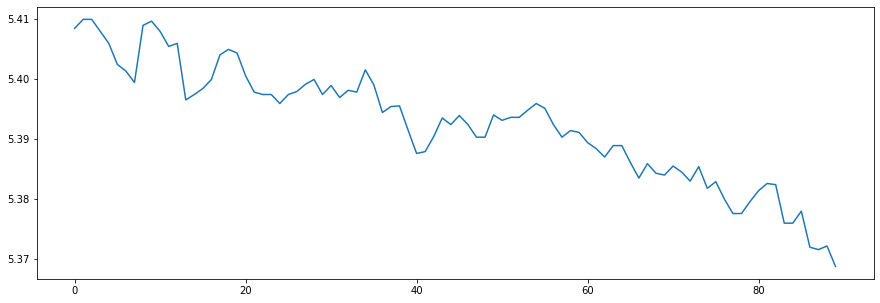

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_btc)
plt.show()